In [1]:
import sklearn.datasets as sk
import sklearn.model_selection as skm
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from skimage import data, io, filters
import pandas as pd
import tensorflow as tf
from math import sqrt

In [2]:
cd ../../Downloads

/home/zaioox/Downloads


In [3]:
digits = sk.load_digits(n_class=10, return_X_y=False)

In [4]:
x_train, x_test, y_train, y_test = skm.train_test_split(digits['data'],digits['target'],test_size=0.2205)

In [5]:
decision_tree=DecisionTreeClassifier(max_depth=14)

In [6]:
decision_tree.fit(x_train,y_train)
a1=decision_tree.predict(x_test)
b1=decision_tree.predict(x_train)
test1=f1_score(y_test,a1,average='micro')
train1=f1_score(y_train,b1,average='micro')
print(test1,train1)

0.853904282115869 1.0


In [7]:
rnd_clf=RandomForestClassifier(n_estimators=100,max_depth=14,n_jobs=-1)
rnd_clf.fit(x_train,y_train)
a=rnd_clf.predict(x_test)
b=rnd_clf.predict(x_train)
test=f1_score(y_test,a,average='micro')
train=f1_score(y_train,b,average='micro')
print(test,train)

0.9773299748110831 1.0


In [8]:
x_train1=x_train.reshape(5,280,64)
y_train1=y_train.reshape(5,280)

In [9]:
decisionforrest=[]
decisionforrestPredictions=[0,1,2,3,4]
for i in range(5):
    decisionforrest.append(DecisionTreeClassifier(max_depth=14))
    decisionforrest[i].fit(x_train1[i],y_train1[i])
    decisionforrestPredictions[i]=decisionforrest[i].predict(x_test)
decisionforrestPredictions=np.array(decisionforrestPredictions)
y_predicted=np.zeros(decisionforrestPredictions.shape[1])

for i in range(decisionforrestPredictions.shape[1]):
    y_predicted_helper=np.zeros(10)
    for j in range(decisionforrestPredictions.shape[0]):
        y_predicted_helper[decisionforrestPredictions[j][i]]+=1
    max=0
    index=0
    for j in range(10):
        if(y_predicted_helper[j]>max):
            max=y_predicted_helper[j]
            index=j
    y_predicted[i]=index

In [10]:
print("With 5 trees the f1_score is: ",f1_score(y_test,y_predicted,average='micro')," with 1 tree the f1_score is ", test1)

With 5 trees the f1_score is:  0.8614609571788413  with 1 tree the f1_score is  0.853904282115869


In [11]:
pictureX=[]
trueVals=[]
for i in range(len(y_test)):
    if(a[i]!=y_test[i]):
        pictureX.append(x_test[i].reshape(8,8))
        trueVals.append(y_test[i])


This image is a : 2


/home/zaioox/.conda/envs/env/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


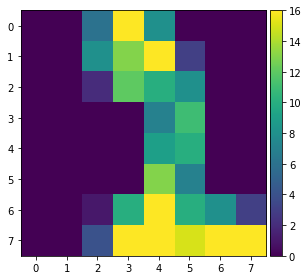

In [12]:
print("This image is a :",trueVals[0])
io.imshow(pictureX[0])

This image is a : 9


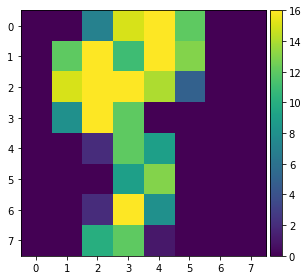

In [13]:
print("This image is a :",trueVals[1])
io.imshow(pictureX[1])

This image is a : 0


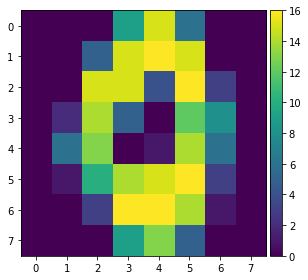

In [14]:
print("This image is a :",trueVals[2])
io.imshow(pictureX[2])

This image is a : 8


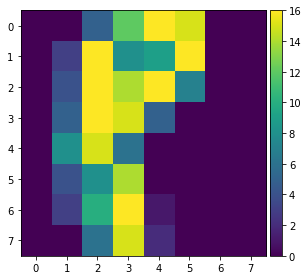

In [15]:
print("This image is a :",trueVals[3])
io.imshow(pictureX[3])

In [16]:
file='internet-traffic-data-in-bits-fr.xlsx'

In [17]:
x1=pd.ExcelFile(file)

In [18]:
df1=x1.parse('internet-traffic-data-in-bits-f')
df1.shape
df1.head()

,Time,"Internet traffic data (in bits) from an ISP. Aggregated traffic in the United Kingdom academic network backbone. It was collected between 19 November 2004, at 09:30 hours and 27 January 2005, at 11:11 hours. Data collected at five minute intervals.",Unnamed: 2
0,2004-11-19 09:30:00,4838.66,NaN
1,2004-11-19 09:35:00,4845.18,NaN
2,2004-11-19 09:40:00,5158,NaN
3,2004-11-19 09:45:00,5637.88,NaN
4,2004-11-19 09:50:00,5520.69,NaN


In [19]:
steps = df1.loc[:,'Internet traffic data (in bits) from an ISP. Aggregated traffic in the United Kingdom academic network backbone. It was collected between 19 November 2004, at 09:30 hours and 27 January 2005, at 11:11 hours. Data collected at five minute intervals.'].tolist()

In [20]:
steps=steps[:19875]
number_steps=10

In [21]:
trainX =np.array([steps[i:i+number_steps] for i in range(len(steps)-number_steps-1)])
trainY=np.array([steps[i+1:i+number_steps+1] for i in range(len(steps)-number_steps-1)])
testX=trainX[0:4000]
trainX=trainX[4000:]
testY=trainY[0:4000]
trainY=trainY[4000:]

In [22]:
trainX=trainX.reshape(-1,number_steps,1)
testX=testX.reshape(-1,number_steps,1)
trainY=trainY.reshape(-1,number_steps,1)
testY=testY.reshape(-1,number_steps,1)


In [23]:
n_steps=number_steps
n_inputs=1
n_neurons=500
n_outputs=1
x=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),output_size=1)
outputs, states = tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [31]:
learning_rate=0.001
loss = tf.reduce_mean(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)
n_iterations=10000
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    init.run()
    for iteration in range(1000):
        indexes=np.random.choice(list(range(len(trainX))),32)
        sess.run(training_op, feed_dict={x: trainX[indexes], y: trainY[indexes]})
        if iteration %50 == 0:
            mse = loss.eval(feed_dict={x: testX, y: testY})
            mset = loss.eval(feed_dict={x:trainX,y:trainY})
            print(iteration, "\tRMSE:", sqrt(mse) ,sqrt(mset))

0 	RMSE: 4453.804890203432 3311.786375960865
50 	RMSE: 1028.7097501239114 761.5592557378578
100 	RMSE: 416.4724818340343 302.4519719104175
150 	RMSE: 154.4114266234044 95.23652709832504
200 	RMSE: 147.8051464872756 89.28484307610671
250 	RMSE: 141.2465500131773 82.63266735888264
300 	RMSE: 143.239582954573 84.13443715640463
350 	RMSE: 142.20267776135583 83.21760877456315
400 	RMSE: 149.78729058860435 89.6329320060434
450 	RMSE: 141.72991618082966 82.5068060639545
500 	RMSE: 147.40457718469938 88.22690251915796
550 	RMSE: 140.6150274241697 81.40789645647865
600 	RMSE: 141.0571969539307 81.75754337330287
650 	RMSE: 142.70923509447454 83.59017807789232
700 	RMSE: 147.1545146160151 87.22899438224368
750 	RMSE: 141.7349735752436 82.71223883516272
800 	RMSE: 139.46028780624255 80.42404097772942
850 	RMSE: 140.53176075624327 81.43452004332991
900 	RMSE: 143.72200134939325 84.27611972242642
950 	RMSE: 142.10229589982 83.11640580572826
